# Neural & Behavioral Modeling - Week 8 (Exercises)
張天瑋 B09705049

In [206]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from sklearn.metrics.pairwise import cosine_similarity
rcParams['figure.figsize'] = (4,6)

## 1 InStar Learning (4 points)
Try to replicate Fig.2 of <a href=https://arxiv.org/pdf/1612.03270.pdf>[1]</a> = Fig. 3A of <a href=https://sci-hub.se/10.1126/science.1212003>[2]</a>:

[1] Huang, T. R. (2016). Hebbian plasticity for improving perceptual decisions. arXiv preprint arXiv:1612.03270.

[2] Shibata, K., Watanabe, T., Sasaki, Y., & Kawato, M. (2011). Perceptual learning incepted by decoded fMRI neurofeedback without stimulus presentation. Science, 334(6061), 1413-1415.

In [200]:
#training
noisy = array([0.8,0.6,0.5,0.4])
finalW = []
for n in noisy:
    # print("n=",n)
    W=random.rand(3) # random initial weights
    for i in range(10): # 10 trials 
        x=array((1-n)*array([0,0,1])+n*random.rand(3)) # same stimulus + noise
        # print("x:",x)
        y=dot(W,x) # the only postsynaptic neuron
        W=W+y*(x-W) # postsynaptically gated InStar 
        # print(W,y)
    finalW.append(W)
finalW

[array([0.2196471 , 0.47977741, 0.71464569]),
 array([0.44360255, 0.21959386, 0.70869402]),
 array([0.25525667, 0.3170826 , 0.70461853]),
 array([0.21059031, 0.31476491, 0.74353134])]

In [201]:
#testing
accuracy = []
for k in range(len(noisy)):
    correct = 0
    for i in range(100):
        W=finalW[k]
        x0=array((1-noisy[k])*array([0,0,1])+noisy[k]*random.rand(3)) # same stimulus + noise
        x1=array((1-noisy[k])*array([0,1,0])+noisy[k]*random.rand(3)) # same stimulus + noise
        x2=array((1-noisy[k])*array([1,0,0])+noisy[k]*random.rand(3)) # same stimulus + noise
        y0=dot(W,x0)#x1 = [0,0,1]
        y1=dot(W,x1)#x2 = [0,1,0]
        y2=dot(W,x2)#x3 = [1,0,0]
        # print("y0:",y0,"y1:",y1,"y2:",y2)
        if y0 > y1 and y0 > y2:
            correct+=1
    accuracy.append(correct)
accuracy

[41, 54, 87, 96]

[0.25       0.66666667 1.         1.5       ]


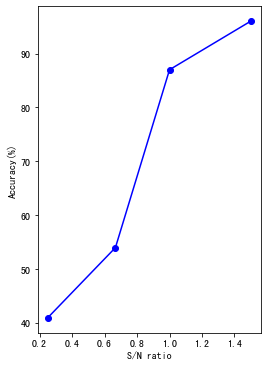

In [211]:
x = (1 - noisy) / noisy
print(x)
ylabel("Accuracy(%)")
xlabel("S/N ratio")
plot(x, accuracy,'o-',color = 'b')

## 2 PyTorch (4 points)
Read <a href="https://www.pytorchtutorial.com/pytorch-for-numpy-users/">this tutorial</a> first and port the following Instar Learning from NumPy to PyTorch:

In [8]:
# Instar learning:
x=array([0.1,0.3,0.6])
W=random.rand(3)
for i in range(10): # trials 
    y=dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

[0.36490153 0.5352851  0.50694818] 0.5520803268677825
[0.23212107 0.41734972 0.5535899 ] 0.5012445899125249
[0.16862752 0.36095485 0.57589325] 0.480570962355711
[0.13632557 0.33226431 0.58723994] 0.4706851551798439
[0.11941035 0.31724024 0.59318173] 0.4656558112558983
[0.11042293 0.30925763 0.59633874] 0.4630221498772228
[0.10561147 0.3049841  0.59802886] 0.4616228275438199
[0.10302529 0.30268706 0.59893731] 0.46087369330442574
[0.10163223 0.30144975 0.59942665] 0.4604710310443997
[0.10088099 0.30078249 0.59969054] 0.460254134893731


In [4]:
### Write your PyTorch codes here
import torch as t
# Instar learning:
x=t.tensor([0.1,0.3,0.6])
W=t.rand(3)
for i in range(10): # trials 
    y=t.dot(W,x) 
    W+=y*(x-W) # postsynaptically gated InStar 
    print(W,y)

tensor([0.2066, 0.2890, 0.6777]) tensor(0.5923)
tensor([0.1518, 0.2946, 0.6377]) tensor(0.5140)
tensor([0.1266, 0.2972, 0.6194]) tensor(0.4862)
tensor([0.1140, 0.2986, 0.6102]) tensor(0.4735)
tensor([0.1075, 0.2992, 0.6054]) tensor(0.4671)
tensor([0.1040, 0.2996, 0.6029]) tensor(0.4638)
tensor([0.1022, 0.2998, 0.6016]) tensor(0.4620)
tensor([0.1012, 0.2999, 0.6008]) tensor(0.4611)
tensor([0.1006, 0.2999, 0.6005]) tensor(0.4606)
tensor([0.1003, 0.3000, 0.6002]) tensor(0.4603)
